# Install libs and config frameworks

♟

In [1]:
# import geopandas as gdf
import matplotlib 
import pandas as pd

## Import data 


### File: 

Read file from: 
https://sidra.ibge.gov.br/acervo#/S/IU/A/110/T/Q 

In [2]:
# xlsx_file_link = '/content/Tabela de dados agregados.xlsx'
# pd.read_excel(xlsx_file_link)

##  Ações necessárias para tratar o arquivo. -  Necessary action for make the file
- Importa o aquivo no formato csv e define para ele uma variável < ppiread >
- definido outra variável < pip_df > , 'read' lê arquivo definindo o separdador que por padrão é ' , ' porem no caso 'sep = ; ' 
- econding por padrão é o 'utf-8' mas no caso é ' econding = 'ISO-8859-1', o que é comum para arquivos dessa fonte de dados. 
- 'display' mostra o for aquivo 'head(10)' define a quantidade de linhas 
- print 

In [ ]:
ppiread = '/content/dados-abertos_ppi_31.08.18.csv'
# df = pd.read_csv(ppiread, encoding='ISO-8859-1', error_bad_lines=False, engine='python')
# ppi_df = pd.read_csv(ppiread, sep=';', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, engine=None, encoding='ISO-8859-1')
ppi_df = pd.read_csv(ppiread, sep = ';', delimiter=None, encoding='ISO-8859-1')
# display(ppi_df.head(10))
display(ppi_df.head(244))
print(ppi_df.shape.index)

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

- Exiba de maneira crua, porém útil para se visualizar a quantidade de linha e colunas 

In [5]:
# ppi_df 

- Excluir as linhas completamente vazias, < dropna(how = 'all') > 
 - para o caso de excluir alguma que tenha pelo menos um  vazio < dropna() >
- Para caso precise remover alguma coluna < .drop('name', axis = 1) >
 - Para remover linha < .drop(0) >
- verificar se tem alguma cédula que esteja vazia < .notnull().all() >

In [6]:
# ppi_df.dropna(how='all') 

- Definer a quantide de valore vazios nas linhas e colunas que sobraram 

In [7]:
# ppi_df.columns

- Checar possíveis colunas vazias:  

In [8]:
# display(ppi_df['Unnamed: 43'].dropna(how=('all')))

In [9]:
# ppi_df.notna()

- Ler a linha especificada e excluir a leitura das vazias 

In [10]:
# display(ppi_df.loc[4].dropna(how=('all')))


- Removedo colunas
 

In [11]:
ppi_df_v2 = ppi_df.drop([ 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40',
                          'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 44',
                          'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',
                          'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52',
                          'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56',
                          'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60',
                          'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64',
                          'Unnamed: 65', 'Unnamed: 66', 'Unnamed: 67', 'Unnamed: 68',
                          'Unnamed: 69', 'Unnamed: 70', 'Unnamed: 71', 'Unnamed: 72',
                          'Unnamed: 73', 'Unnamed: 74', 'Unnamed: 75', 'Unnamed: 76',
                          'Unnamed: 77', 'Unnamed: 78', 'Unnamed: 79', 'Unnamed: 80',
                          'Unnamed: 81'], axis=1)

In [12]:
ppi_df_v3 = ppi_df_v2.dropna(how='all') 

In [13]:
# ppi_df_v3

- Clear cvs file (Limpar arquivo) 

In [14]:
# ppi_df_v3['Unnamed: 0'].head(15)

- Procurando valores vazios em cada coluna (missing empty value) 

In [15]:
# count = 0 
# for row in ppi_df_v3['Unnamed: 10']:
#     try:
#       int(row)
#       ppi_df_v3[count, 'Unnamed: 10'] = np.nan
#     except ValueError: 
#       pass
#     count += 1 

- count number values cells (contando o numero de celulas vazias) 

In [16]:
# ppi_df_v3.isnull().sum()

- check info above, include empty columns in step above - code line 27 (checar a informação acima e incluir as as colunas  vazias na rotina da linha do cidigo 27) - ajust this after. 

In [17]:
# ppi_df_v3['Unnamed: 27'].head(200)

In [18]:
ppi_df_v4 = ppi_df_v3.drop([ 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
                          'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
                          'Unnamed: 34'], axis = 1) 

In [19]:
# ppi_df_v4

- Dtype columns 

In [20]:
# ppi_df_v4.info() # ppi_df_v4.info(verbose=True) 

- metodo < query >  

In [21]:
# ppi_df_v4.map(lambda x: x.replace('', '_') if isinstance(x, (str))else x)
# ppi_df_v4.query('Nation == "Brasil"').head(10)

In [22]:
# ppi_df_v4.index

In [23]:
# ppi_df_v4.columns

In [24]:
# ppi_df_v4.set_index('Unnamed: 0', inplace=True)

- set index for column 01 - (reindexando a primeira coluna, que por padrão é gerada pelo pandas) 

In [25]:
# ppi_df_v4.set_index('Unnamed: 0', inplace=True)

- Use loc <.loc[row1, row2...['column1', 'column2',...]] for slace < : >  

In [26]:
pd.set_option('max_rows', 200)
pd.set_option('max_columns', 100)

In [27]:
# ppi_df_v4.loc[4:]

- Describe quantidades, particularidades, referência e frequência.

In [28]:
# ppi_df_v4.describe()

In [29]:
# ppi_df_v4.columns.values

# Create a new dataframe - Criação de um novo dataframe 

- Criação de nova dataframe if new colunas e linhas. 
 - (create new dataframe) 

In [30]:
df_pip_new = ppi_df_v4

In [31]:
df_pip_new.columns = [' #', 'Empreendimento', 'UF', 'Previsão de Conclusão', 'Investimentos\nEstimados',
                       'Outorga Efetiva', '% Excedente Partilha Mínimo (média das áreas)', '% Excedente Partilha', 'Nº Empresas participantes Leilões', 'Empresas Participantes',
                       'Nacionalidade', 'Publicação do Edital * Termo Aditivo', ' Sessão Pública (Leilão)', 'Licitante\nVencedora',
                       'Nacionalidade', 'Ministério', 'Setor', 'Subsetor',
                       'Modalidade\nOperacional', 'Qualificação', 'ESTUDO - MARCOS DO PROJETO', 'CONSULTA PÚBLICA',
                       'ACÓRDÃO TCU', 'EDITAL', 'LEILÃO', 'CONTRATO', 'ESTÁGIO ATUAL DO PROCESSO',
                       'MODALIDADE CONCESSÃO', 'MODALIDADE PRORROGAÇÃO', 'NA']


In [32]:
# df_pip_new

In [33]:
# df_pip_new['MODALIDADE CONCESSÃO']

In [34]:
# print(df_pip_new.loc[:, ['Outorga Efetiva', 'NA']])

In [35]:
# display(ppi_df['MODALIDADE CONCESSÃO'].dropna(how=('all')))

 - Create a subdata - Criar uma subtabela Modallidade de concessão  

In [36]:
df_modal_concessao = pd.DataFrame({'MODALIDADE CONCESSÃO': ['1. Estudo', '2. Consulta Pública ',
                                                            '3. Análise TCU', '4. Edital publicado',
                                                            '5. Leilão realizado', '6. Contrato assinado']},
                                   index=[0,1,2,3,4,5])
df_modal_concessao

,MODALIDADE CONCESSÃO
0,1. Estudo
1,2. Consulta Pública
2,3. Análise TCU
3,4. Edital publicado
4,5. Leilão realizado
5,6. Contrato assinado


In [37]:
# df_pip_new['MODALIDADE PRORROGAÇÃO']

- Remove row and columns. Remover linas e colunas  

In [38]:
df_pip_new_01 = df_pip_new.drop(columns = [' #', 'MODALIDADE CONCESSÃO', 'MODALIDADE PRORROGAÇÃO'])

In [39]:
df_pip_new_02 = df_pip_new_01.drop([0,1,2,3,4])

In [40]:
# df_pip_new_02.head()

- Apply changes in index and ajust first rows - Ajustando a primeira linha do df para gerar um novo index. 

In [41]:
df_pip_new_03 = df_pip_new_02.reset_index(drop=True)

In [42]:
df_pip_new_03.head(200)

,Empreendimento,UF,Previsão de Conclusão,Investimentos\nEstimados,Outorga Efetiva,% Excedente Partilha Mínimo (média das áreas),% Excedente Partilha,Nº Empresas participantes Leilões,Empresas Participantes,Nacionalidade,Publicação do Edital * Termo Aditivo,Sessão Pública (Leilão),Licitante\nVencedora,Nacionalidade,Ministério,Setor,Subsetor,Modalidade\nOperacional,Qualificação,ESTUDO - MARCOS DO PROJETO,CONSULTA PÚBLICA,ACÓRDÃO TCU,EDITAL,LEILÃO,CONTRATO,ESTÁGIO ATUAL DO PROCESSO,NA
0,Aeroporto de Salvador/ BA,BA,NaN,"R$ 2.350.000.000,00","R$ 1.590.000.000,00",NaN,NaN,3,CONSÓRCIO VINCI AIRPORTS (VINCI AIRPORTS SAS e...,França/ Brasil,01/12/2016,16/03/2017,CONSÓRCIO VINCI AIRPORTS (VINCI AIRPORTS SAS e...,França/ Brasil,MTPA,Transportes,Aeroportuário,Concessão,1ª REUNIÃO,CONCLUÍDO,CONCLUÍDO,CONCLUÍDO,CONCLUÍDO,CONCLUÍDO,CONCLUÍDO,6. Contrato assinado,"1.590.000.000,00"
1,Aeroporto de Florianópolis/ SC,SC,NaN,"R$ 960.700.000,00","R$ 241.000.000,00",NaN,NaN,3,CONSÓRCIO VINCI AIRPORTS (VINCI AIRPORTS SAS e...,Suíça,01/12/2016,16/03/2017,ZURICH AIRPORTINTERNATIONAL AG,Suíça,MTPA,Transportes,Aeroportuário,Concessão,1ª REUNIÃO,CONCLUÍDO,CONCLUÍDO,CONCLUÍDO,CONCLUÍDO,CONCLUÍDO,CONCLUÍDO,6. Contrato assinado,"241.000.000,00"
2,Aeroporto de Fortaleza/ CE,CE,NaN,"R$ 1.401.000.000,00","R$ 1.505.000.000,00",NaN,NaN,3,CONSÓRCIO VINCI AIRPORTS (VINCI AIRPORTS SAS e...,Alemanha,01/12/2016,16/03/2017,FRAPORT AG FRANKFURT AIRPORT SERVICES WORLDWIDE,Alemanha,MTPA,Transportes,Aeroportuário,Concessão,1ª REUNIÃO,CONCLUÍDO,CONCLUÍDO,CONCLUÍDO,CONCLUÍDO,CONCLUÍDO,CONCLUÍDO,6. Contrato assinado,"1.505.000.000,00"
3,Aeroporto de Porto Alegre/ RS,RS,NaN,"R$ 1.902.000.000,00","R$ 382.000.000,00",NaN,NaN,3,CONSÓRCIO VINCI AIRPORTS (VINCI AIRPORTS SAS e...,Alemanha,01/12/2016,16/03/2017,FRAPORT AG FRANKFURT AIRPORT SERVICES WORLDWIDE,Alemanha,MTPA,Transportes,Aeroportuário,Concessão,1ª REUNIÃO,CONCLUÍDO,CONCLUÍDO,CONCLUÍDO,CONCLUÍDO,CONCLUÍDO,CONCLUÍDO,6. Contrato assinado,"382.000.000,00"
4,Aeroporto de Maceió/ AL,AL,2018,"R$ 2.100.000.000,00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MTPA,Transportes,Aeroportuário,Concessão,3ª REUNIÃO,CONCLUÍDO,CONCLUÍDO,NaN,NaN,NaN,NaN,3. Análise TCU,NaN
5,Aeroporto de João Pessoa/ PB,PB,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MTPA,Transportes,Aeroportuário,Concessão,3ª REUNIÃO,CONCLUÍDO,CONCLUÍDO,NaN,NaN,NaN,NaN,3. Análise TCU,NaN
6,Aeroporto de Aracaju/ SE,SE,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MTPA,Transportes,Aeroportuário,Concessão,3ª REUNIÃO,CONCLUÍDO,CONCLUÍDO,NaN,NaN,NaN,NaN,3. Análise TCU,NaN
7,Aeroporto de Juazeiro do Norte/ CE,CE,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MTPA,Transportes,Aeroportuário,Concessão,3ª REUNIÃO,CONCLUÍDO,CONCLUÍDO,NaN,NaN,NaN,NaN,3. Análise TCU,NaN
8,Aeroporto de Campina Grande/ PB,PB,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MTPA,Transportes,Aeroportuário,Concessão,3ª REUNIÃO,CONCLUÍDO,CONCLUÍDO,NaN,NaN,NaN,NaN,3. Análise TCU,NaN
9,Aeroporto de Recife/ PE,PE,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MTPA,Transportes,Aeroportuário,Concessão,3ª REUNIÃO,CONCLUÍDO,CONCLUÍDO,NaN,NaN,NaN,NaN,3. Análise TCU,NaN


## Isolate Dataframes - classificar base de dados

In [43]:
df_emprLocal = df_pip_new_03.loc[:, ['Empreendimento', 'UF']]

In [44]:
# display(df_emprLocal)

In [45]:
df_emprLocal_00 = df_emprLocal.drop(index = [191, 192, 193, 194])

In [46]:
df_emprLocal_00

,Empreendimento,UF
0,Aeroporto de Salvador/ BA,BA
1,Aeroporto de Florianópolis/ SC,SC
2,Aeroporto de Fortaleza/ CE,CE
3,Aeroporto de Porto Alegre/ RS,RS
4,Aeroporto de Maceió/ AL,AL
5,Aeroporto de João Pessoa/ PB,PB
6,Aeroporto de Aracaju/ SE,SE
7,Aeroporto de Juazeiro do Norte/ CE,CE
8,Aeroporto de Campina Grande/ PB,PB
9,Aeroporto de Recife/ PE,PE


# Local buidings. - Localização das obras 

- install frameworks 

In [ ]:
!pip install geopandas

In [ ]:
!pip install geopy 

- import libs 

In [49]:
import geopandas as gpd

- treat location 

In [ ]:
gpd.tools.geocode(df_emprLocal_00['Empreendimento'], provider = 'nominatim', user_agent='UF Builds', country_bias = 'brazil_states')

In [ ]:
df_emprLocal_00

In [55]:
df_emprLocal_01 = gpd.tools.geocode(df_emprLocal_00['Empreendimento'], provider = 'nominatim', user_agent='UF Builds', country_bias = 'brazil_states')['geometry']

In [ ]:
df_emprLocal_01 = df_emprLocal_00['Empreendimento'].dropna(how=('all'))
df_emprLocal_01

In [ ]:
df_emprLocal_01.index.values

In [57]:
ppi_map_00 = df_emprLocal_01.drop(index=[ 21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60, 63, 69, 70, 72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181,
       182, 183, 184, 185, 186, 187, 188, 189, 190])

In [58]:
ppi_map_00

0      POINT (-38.34109 -12.90422)
1      POINT (-48.53533 -27.68058)
2       POINT (-38.53549 -3.77626)
3      POINT (-51.18287 -29.98773)
4       POINT (-35.71050 -9.66392)
5       POINT (-34.94622 -7.15926)
6      POINT (-37.07603 -10.98281)
7       POINT (-39.26783 -7.21970)
8       POINT (-35.89610 -7.27016)
9       POINT (-34.91461 -8.13418)
10     POINT (-56.10938 -15.65949)
11     POINT (-54.72482 -16.58343)
12     POINT (-54.20920 -11.26335)
13      POINT (-56.10604 -9.86616)
14     POINT (-52.39007 -15.86067)
15     POINT (-40.28136 -20.25609)
16     POINT (-41.76577 -22.34317)
17     POINT (-47.90483 -15.77169)
18     POINT (-43.96837 -19.63340)
19     POINT (-43.25862 -22.81122)
20     POINT (-46.48132 -23.43779)
61     POINT (-50.50056 -19.04419)
62     POINT (-48.88310 -26.29660)
64     POINT (-43.18706 -22.64757)
65     POINT (-43.26644 -22.01128)
66     POINT (-49.12143 -12.91521)
67     POINT (-60.06599 -12.86027)
68     POINT (-50.29751 -18.69330)
71     POINT (-50.64

- convert geometry for data to read in projetc  

In [59]:
# from shapely import geometry
# ppi_map_01 = gpd.GeoDataFrame(geometry = gpd.points_from_xy)

# Plot map with data

- install libs

In [99]:
import matplotlib.pyplot as plt

In [100]:
from matplotlib import colors as mcolors

In [ ]:
!pip install cartopy

In [87]:
import cartopy.crs as ccrs 

In [125]:
import fiona

In [126]:
fiona.supported_drivers

{'ARCGEN': 'r',
 'CSV': 'raw',
 'DGN': 'raw',
 'DXF': 'rw',
 'ESRI Shapefile': 'raw',
 'ESRIJSON': 'r',
 'FlatGeobuf': 'rw',
 'GML': 'rw',
 'GPKG': 'raw',
 'GPSTrackMaker': 'rw',
 'GPX': 'rw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'OGR_GMT': 'rw',
 'OGR_PDS': 'r',
 'OpenFileGDB': 'r',
 'S57': 'r',
 'SQLite': 'raw',
 'TopoJSON': 'r'}

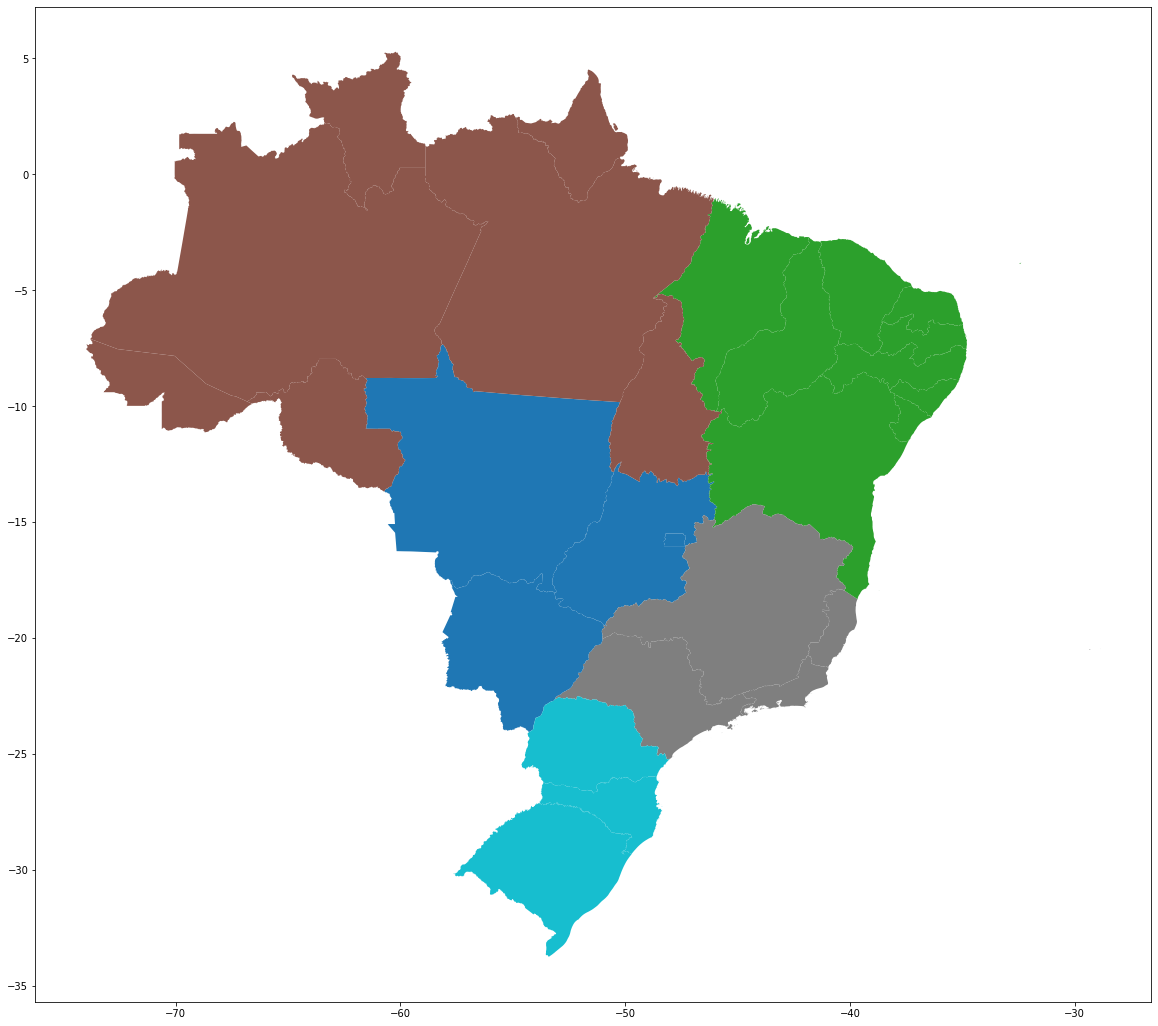

In [98]:
mapaBrasil = gpd.read_file('/content/brazil_states/BRUFE250GC_SIR.shp')
mapaBrasil.plot(column = 'NM_REGIAO', figsize=(20, 20))

In [61]:
# print(mapaBrasil.area)

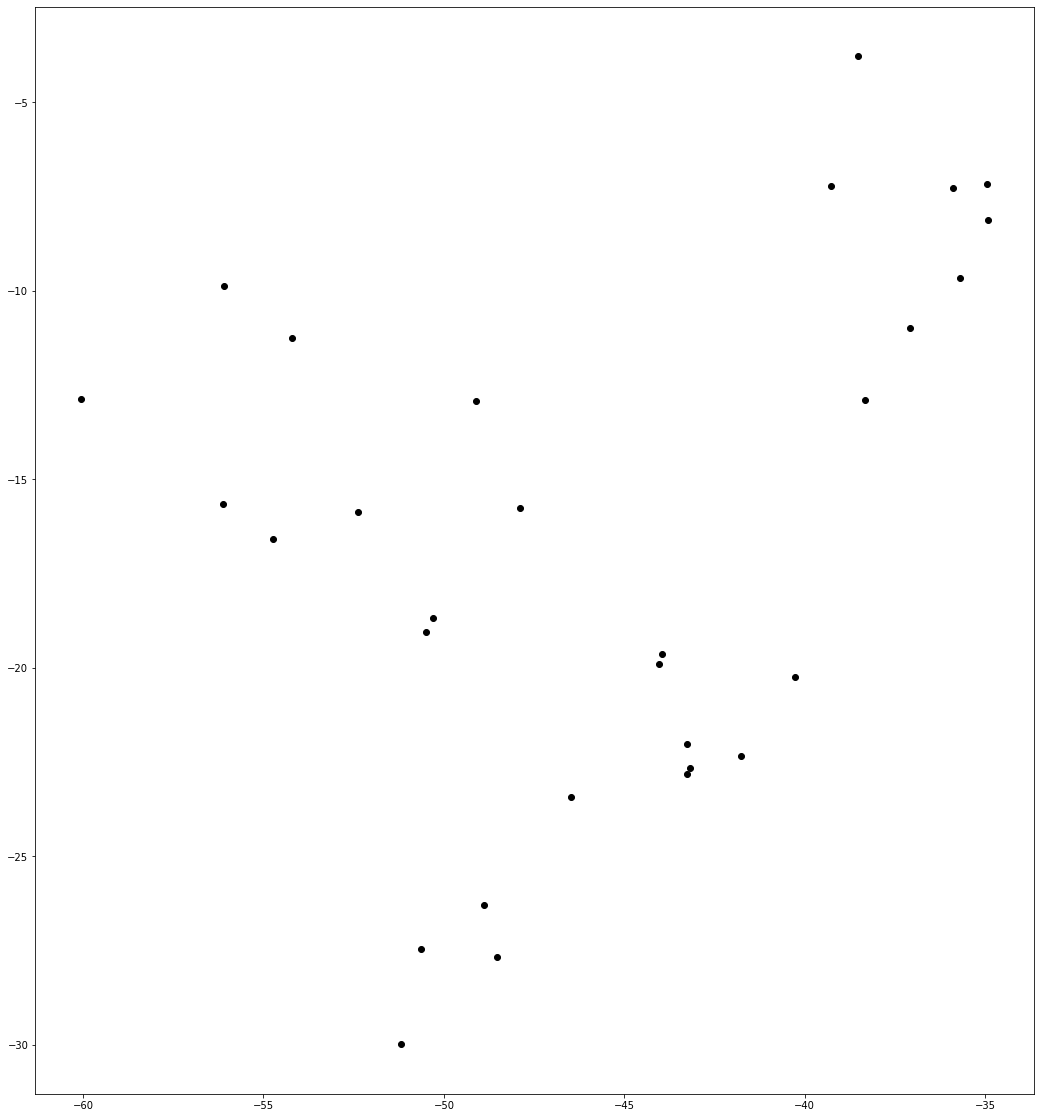

In [128]:
ppi_plot = ppi_map_00.plot(color='black',  figsize=(20, 20))# < cmap='  ' > color options 

In [132]:
ppi_plot.to_file('ppi_map03.shp')

AttributeError: ignored

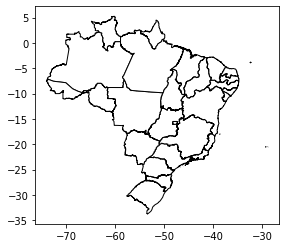

In [117]:
fig, ax = plt.subplots()
mapaBrasil.plot(ax=ax, color='white', edgecolor='black')
ppi_plot.plot(ax=ax, marker='o', color='red', markersize=5)
plt.show();

In [111]:
ax = ppi_plot.plot(color='black')
mapaBrasil.plot(ax=ax);

AttributeError: ignored

AttributeError: ignored

In [ ]:
from shapely.geometry import Polygon 

In [ ]:
fig, ax = plt.subplots(figsize= (20, 20))
mapaBrasil.plot(ax=ax, column = 'NM_REGIAO') 
ppi_plot.plot(ax=ax, color='black')
for x, y, label in zip(ppi_plot.geometry.x, ppi_plot.geometry.y, ppi_plot.address): 
  ax.annotate(label, xy=(x, y), xytext=(2, 2), textcoords = 'offset points', size = 12, color='black')



# Formatting - FORMATAÇÃO 

- Export file to csv 

In [ ]:
# new_data_ppi.to_csv('easy_read_data_ppi.csv')

# Categorical variable 


- Describe quantidades, particularidades, referência e frequência. 

In [ ]:
# df_pip_cats = ppi_df_v4.select_dtypes(include=object)

In [ ]:
# df_pip_cats.describe()

In [ ]:
# df_pip_cats.rename(columns={'Unnamed: 15' : 'Setor'}, inplace=True)

## One-hot enconder - tratamentode variáveis categoricas nominais.

- Category Encoders / Scikit Learn
 - Docs:
  -  https://contrib.scikit-learn.org/category_encoders/index.html
  - https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-categorical-features


In [ ]:
# !pip install category_encoders

In [ ]:
# import category_encoders as ce

In [ ]:
# from category_encoders.one_hot import OneHotEncoder

In [ ]:
# df_pip_cats['Setor'].head(15)

In [ ]:
# one_hot_enc = OneHotEncoder(cols=['Setor'])

In [ ]:
# one_hot_enc.fit_transform(df_pip_cats)

In [ ]:
# df_pip_cats.loc[4]

- create dateframe reduced 

In [ ]:
# df_pip_cats.columns

In [ ]:
# df_pip_cats.columns = [' #', 'Empreendimento', 'UF', 'Previsão de Conclusão', 'Investimentos\nEstimados',
#                        'Outorga Efetiva', '% Excedente Partilha Mínimo (média das áreas)', '% Excedente Partilha', 'Nº Empresas participantes Leilões', 'Empresas Participantes',
#                        'Nacionalidade', 'Publicação do Edital/\nTermo Aditivo', ' Sessão Pública (Leilão)', 'Licitante\nVencedora',
#                        'Nacionalidade', 'Ministério', 'Setor', 'Subsetor',
#                        'Modalidade\nOperacional', 'Qualificação', 'ESTUDO', 'CONSULTA PÚBLICA',
#                        'ACÓRDÃO TCU', 'EDITAL', 'LEILÃO', 'CONTRATO', 'ESTÁGIO ATUAL DO PROCESSO',
#                        'MODALIDADE CONCESSÃO', 'MODALIDADE PRORROGAÇÃO', 'NA']



In [ ]:
# df_pip_cats.raname(columns=lambda )
#    5544             return type(self).from_tuples(items, names=self.names)
#    5545         else:
# -> 5546             items = [func(x) for x in self]
#    5547             return Index(items, name=self.name, tupleize_cols=False)

# LabelEncoder

- Docs: 
 - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

# Data processing

Site of search

In [ ]:
# url = '...'

Read the spreadsheet: the format can be different, in this case html 

In [ ]:
# html = pd.read_html(url, match='nome') 

bulding local spreadsheet

In [ ]:
# areas_leitura = {'coll': [1,2], 'coll': [3,4]}

In [ ]:
# areas_leitura = pd.DataFrame() 

# data command apply 

- necessario para realizar a conversão e formatação de algum valor que esteja em uma formatação incoerente ao Pandas. 

In [ ]:
# exemplo: modificar strings = type = object

# df_name['column_name'] = df_name['column_name'].apply(lambda x: str(x).replace(",", "."))

# exemplo: converter de type = object to type = float 

# df_name['column_name'] = df_name['column_name'].astype('float64') ## para que seja dado o inplace = true 

## realizar ações para calcular, por exemplo a média: 

# df_name['column_name'].mean()

## ou plotar 
# df_name['column_name'].plot()


################ CRiar DATAFRAMES 

#new_data_ppi = pd.DataFrame({'col00':[0,1,2],'col01':[0,1,2],'col02':[0,1,2]}, index=['row_00', 'row_01', 'row_02'])

# SERIES 

# variable = pd.Series(['0', '1', '2', '3'], index=['00', '01', '02', '03'], name='series_name')

 - modificando o tamanho de leitura do pandas, que por padrão virá: 50 caracteres 

In [ ]:
# pd.get_option('max_colwidht') # mostra o tamanho máximo das colunas 
# df_name['column_name'].str.len().max() # mostra o tamenho máximo do conjunto de caractérias apresentado nessa column 
# pd.set_option('max_colwidth', 100) # atribui um valor desejado para o conjunto de caractéres apresentado, porém pode-se usar o < None > caso queira deixar ilimitado. 

## o mesmo serve para exibir todas as linhas ou colunas 

# pd.get_option('max_columns')
# pd.set_option('max_columns' 100)

# links úteis

- documentação pandas: 
 - https://pandas.pydata.org/

- Geopandas 
  - https://geopandas.org/en/stable/  

- OpenStreetMap
  - https://www.openstreetmap.org/ 

- settings pandas: 
 - https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html 

# Padronização dos dados 

- Para um grande conjunto de dados, quando necessário a padronização. 

In [ ]:
# !pip install unidecode

In [ ]:
# import geopandas as gpd 
# import unidecode 
# import os 

In [ ]:
# for file_directory, files in os.walk('file_name'): #entrada dos arquivos 
#   for i_file in files:
#     geo_data_frame = unidecode.unidecode(i_file.lower().replace(' ', '_')) # tratando os nomes dos aquivos, letras minusculas e espaçoes vazios, e unificando os codigos em caso de acentos 
#     origin_file_name = gpd.read_file(f'file_name/{i_file}') # ler o aquivo original 
#     # tratando os sistemas de coordenadas 
#     print(geo_data_frame)
#     # formato padronizado de para o padrao brasileiro 
#     if origin_file_name.crs != 5880:
#       geo_data_frame = origin_file_name('epsg:5880')
#       origin_file_name(f'./caminho_a_ser_salvo/{geo_data_frame}', driver='formato_arquivo') # caminho a ser salvo a nova versão padronizada / talves seja necessário: < driver='GPKG')
#     else: 
#       origin_file_name(f'./caminho_a_ser_salvo/{geo_data_frame}', driver='formato_arquivo') # caso seja de padrao desconhecido salva mesmo assim
#     print(origin_file_name.crs)

    